# **Customer Personality Analysis**

Customer personality analysis, also known as customer segmentation or customer profiling, involves identifying and understanding the distinct characteristics, preferences, behaviors, and needs of different customer groups within a company's target market. By analyzing customer data and demographics, businesses can gain insights into various customer segments and develop tailored marketing strategies and product modifications to meet their specific requirements.

Rather than employing a generic marketing approach that targets all customers indiscriminately, customer personality analysis allows businesses to focus their resources on the most promising customer segments. This targeted marketing approach increases the efficiency and effectiveness of marketing campaigns, as businesses can allocate their budget and efforts toward the customers who are more likely to be interested in and purchase their products or services.

For example, a company may discover through customer personality analysis that a particular customer segment, such as young professionals with a high disposable income, is most likely to be interested in a new luxury product they are launching. Instead of spending resources on marketing to the entire customer database, the company can concentrate its efforts on reaching and engaging with this specific segment through tailored marketing messages, channels, and promotions. This helps optimize marketing investments and improves the chances of attracting and retaining customers who are more likely to convert and become loyal to the brand.

In summary, customer personality analysis enables businesses to gain a deeper understanding of their customers and target their marketing efforts and product modifications to specific customer segments, resulting in more efficient and effective marketing strategies and improved customer satisfaction.

## **About DataSet**

This dataset contains 29 variables and 2240 observations about different customers.

**Data explanation provided:**

**People**

* **ID:** Customer's unique identifier
* **Year_Birth:** Customer's birth year
* **Education:** Customer's education level
* **Marital_Status:** Customer's marital status
* **Income:** Customer's yearly household income
* **Kidhome:** Number of children in customer's household
* **Teenhome:** Number of teenagers in customer's household
* **Dt_Customer:** Date of customer's enrollment with the company
* **Recency:** Number of days since customer's last purchase
* **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* **MntWines:** Amount spent on wine in last 2 years
* **MntFruits:** Amount spent on fruits in last 2 years
* **MntMeatProducts:** Amount spent on meat in last 2 years
* **MntFishProducts:** Amount spent on fish in last 2 years
* **MntSweetProducts:** Amount spent on sweets in last 2 years
* **MntGoldProds:** Amount spent on gold in last 2 years

**Promotion**

* **NumDealsPurchases:** Number of purchases made with a discount
* **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* **NumWebPurchases:** Number of purchases made through the company’s website
* **NumCatalogPurchases:** Number of purchases made using a catalogue
* **NumStorePurchases:** Number of purchases made directly in stores
* **NumWebVisitsMonth:** Number of visits to company’s website in the last month

**Objective:**

* Make a cluster analysis for the problem of customer segmentation in the store.

Customer segmentation through cluster analysis can provide valuable insights for your store's marketing and business strategies. By identifying distinct customer segments, you can better understand their preferences, behaviors, and needs, allowing you to tailor your offerings and communication to meet their specific requirements. 

**Tasks we will perform on this jupyter notebook:**

**Data Cleaning:**
* Data Cleaning.
* Feature Enginering.

**Data Preparation:**
* Apply label encoding to the categorical features
* Utilice the standard scaler for feature scaling 
* Generate a subset dataframe for dimensionality reduction purposes.

**Dimensionality Reduction:**
* Dimensionality reduction with PCA

**Clustering:**
* Apply Elbow Method, to determine the optimal number of clusters for the data. 
* Apply Agglomerative Clustering algorithm to create the clusters. 
* Analyze and explore the characteristics of each cluster.

## **Libraries**

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# LOADING THE DATA
df = pd.read_csv("marketing_campaign.csv", sep = "\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## **Understanding The Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [5]:
df.describe(include = "O").transpose()

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


In [6]:
# CHEKING NULL VALUES
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# CHEKING DUPLICATE VALUES
dup = df[df.duplicated()]
dup

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


* There are missing values in the income column of the dataset. 
* The Dt_Customer column, which indicates the date when customers joined, is currently not in the DateTime format. 
* Additionally, some features in the data frame are categorical, identified by their object data type, and will need to be converted into numeric forms at a later stage.

In [8]:
# CHEKING UNIQUE VALUES IN THE CATEGORICAL FEATURES
print("\nUnique values in Marital Status:\n\n", df["Marital_Status"].value_counts(), "\n\n")
print("Unique values in Education:\n\n", df["Education"].value_counts())


Unique values in Marital Status:

 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 


Unique values in Education:

 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


## **Data Cleaning**

In [9]:
# REMOVING NULL VALUES
df = df.dropna()

In [10]:
# CALCULATING THE AGE OF THE CUSTOMERS
df["Age"] = 2023 - df["Year_Birth"]

# TOTAL SPENDING
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

# LIVING SITUATION BY MARITAL STATUS
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

# TOTAL NUMBER OF CHILDREN IN THE HOUSE
df["Children"] = df["Kidhome"] + df["Teenhome"]

# FAMILY SIZE
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner": 2}) + df["Children"]

# PARENT STATUS
df["Is_Parent"] = np.where(df.Children > 0, 1, 0)

# EDUCATION LEVEL
df["Education"] = df["Education"].replace({"Basic":"Undergraduate", "2n Cycle": "Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# RENAMING SOME COLUMNS
df = df.rename(columns = {"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# DROPPING UNNECESARY COLUMNS
cols = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(cols, axis = 1)

In [11]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,2525.000000,3.000000,5.000000,1.000000


As wee can see the statistics provided above indicate disparities in the average income and age, as well as the maximum income and age. 

This is most likely due to the presence of outliners in the dataset. An outlier, in the context of data analysis, is an observation or data point that significantly differs from other observations in a dataset. It is a value that lies an abnormal distance away from other values, either higher or lower, making it stand out from the rest of the data.

Outliers can occur due to various reasons, including measurement errors, data entry mistakes, natural variations, or rare events. They can manifest in different forms, such as unusually high or low values, data points far away from the mean, or observations that do not follow the general trend or pattern of the data.

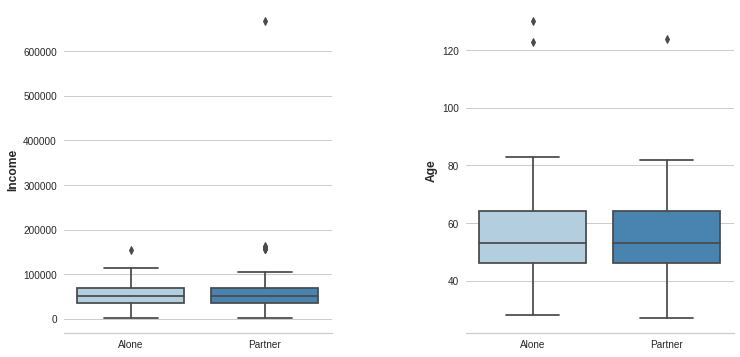

In [12]:
# POSITION
fig = plt.figure(figsize = (12,6))
gs = fig.add_gridspec(nrows = 1, ncols = 2, wspace = .5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# INCOME
sns.boxplot(data = df, x = "Living_With", y = "Income", ax = ax0, palette = "Blues")
ax0.set_ylabel("Income", fontweight = "bold", fontsize = 12)
ax0.set_xlabel("")

# Age
sns.boxplot(data = df, x = "Living_With", y = "Age", ax = ax1,  palette = "Blues")
ax1.set_ylabel("Age", fontweight = "bold", fontsize = 12)
ax1.set_xlabel("")

for i in ["top", "left", "right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)

plt.show()

In [13]:
# FUNTION TO REMOVE OUTLINERS 

def remove_outliers(data: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Income')

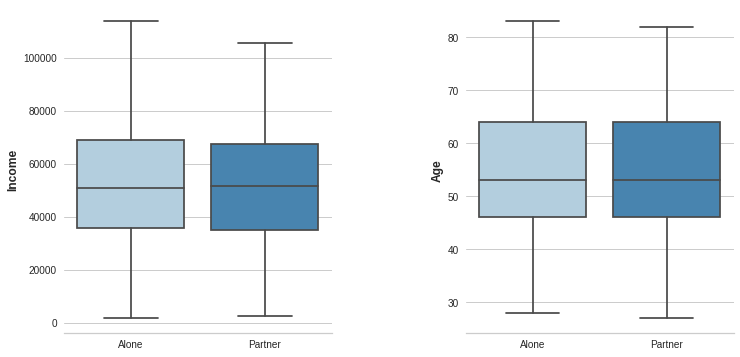

In [14]:
# POSITION
fig = plt.figure(figsize = (12,6))
gs = fig.add_gridspec(nrows = 1, ncols = 2, wspace = .5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# INCOME
sns.boxplot(data = df, x = "Living_With", y = "Income", ax = ax0, palette = "Blues")
ax0.set_ylabel("Income", fontweight = "bold", fontsize = 12)
ax0.set_xlabel("")

# Age
sns.boxplot(data = df, x = "Living_With", y = "Age", ax = ax1,  palette = "Blues")
ax1.set_ylabel("Age", fontweight = "bold", fontsize = 12)
ax1.set_xlabel("")

for i in ["top", "left", "right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)

plt.show()

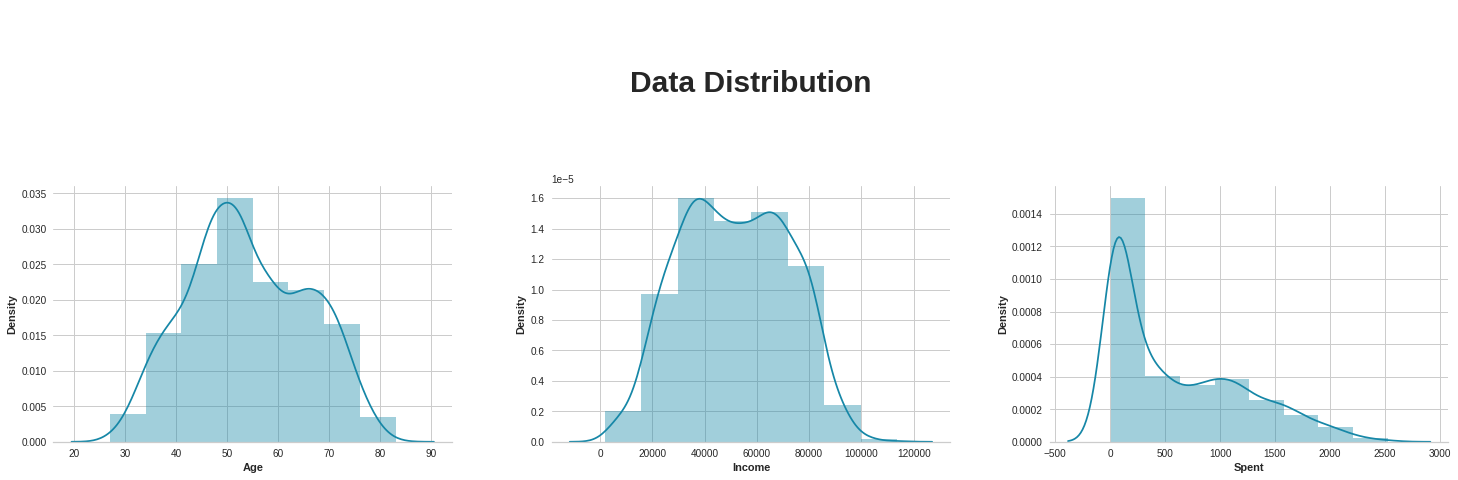

In [39]:
#POSITION
fig = plt.figure(figsize = (25,8))
gs = fig.add_gridspec(nrows = 2, ncols = 3, wspace = .25, hspace = -.3)
ax0 = fig.add_subplot(gs[0,1])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])

# Background
# Background
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# TITLE 
ax0.text(0.5 ,0.7,
        "Data Distribution",
        fontsize = 30,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# AGE
sns.distplot(df["Age"], bins = 8, kde = True, color ="#1687A7", ax = ax1)
ax1.set_ylabel("Density", fontweight = "bold")
ax1.set_xlabel("Age", fontweight = "bold")

# ANNUAL INCOME
sns.distplot(df["Income"], bins = 8, kde = True, color ="#1687A7", ax = ax2)
ax2.set_ylabel("Density", fontweight = "bold")
ax2.set_xlabel("Income", fontweight = "bold")

# SPENDING SCORE
sns.distplot(df["Spent"], bins = 8, kde = True, color ="#1687A7", ax = ax3)
ax3.set_ylabel("Density", fontweight = "bold")
ax3.set_xlabel("Spent", fontweight = "bold")

for i in ["top", "right", "left"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)

plt.show()

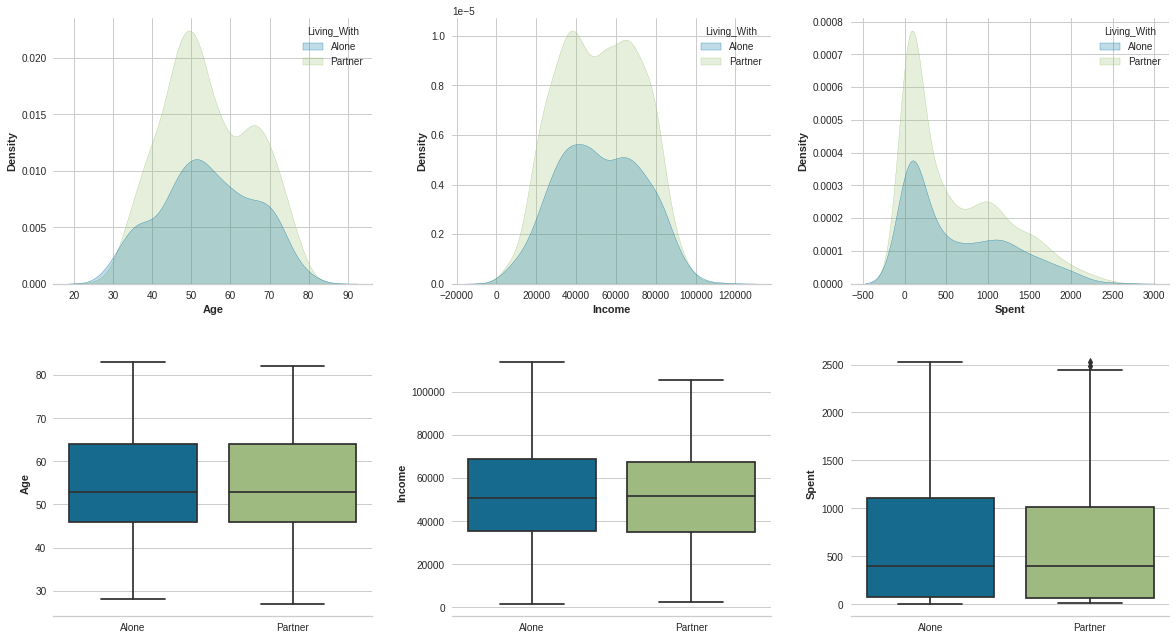

In [16]:
#POSITION
fig = plt.figure(figsize = (20,11))
gs = fig.add_gridspec(nrows = 2, ncols = 3, wspace = .25, hspace = .25)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])


# Background
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)

# AGE
sns.kdeplot(df["Age"], shade = True, hue = df["Living_With"], ax = ax1)
ax1.set_ylabel("Density", fontweight = "bold")
ax1.set_xlabel("Age", fontweight = "bold")

sns.boxplot(data = df, x = "Living_With", y = "Age", ax = ax4)
ax4.set_ylabel("Age", fontweight = "bold")
ax4.set_xlabel("")

# ANNUAL INCOME
sns.kdeplot(df["Income"], shade = True, hue = df["Living_With"], ax = ax2)
ax2.set_ylabel("Density", fontweight = "bold")
ax2.set_xlabel("Income", fontweight = "bold")

sns.boxplot(data = df, x = "Living_With", y = "Income", ax = ax5)
ax5.set_ylabel("Income", fontweight = "bold")
ax5.set_xlabel("")

# SPENDING SCORE
sns.kdeplot(df["Spent"], shade = True, hue = df["Living_With"], ax = ax3)
ax3.set_ylabel("Density", fontweight = "bold")
ax3.set_xlabel("Spent", fontweight = "bold")

sns.boxplot(data = df, x = "Living_With", y = "Spent", ax = ax6)
ax6.set_ylabel("Spent", fontweight = "bold")
ax6.set_xlabel("")


for i in ["top", "right", "left"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)


plt.show()

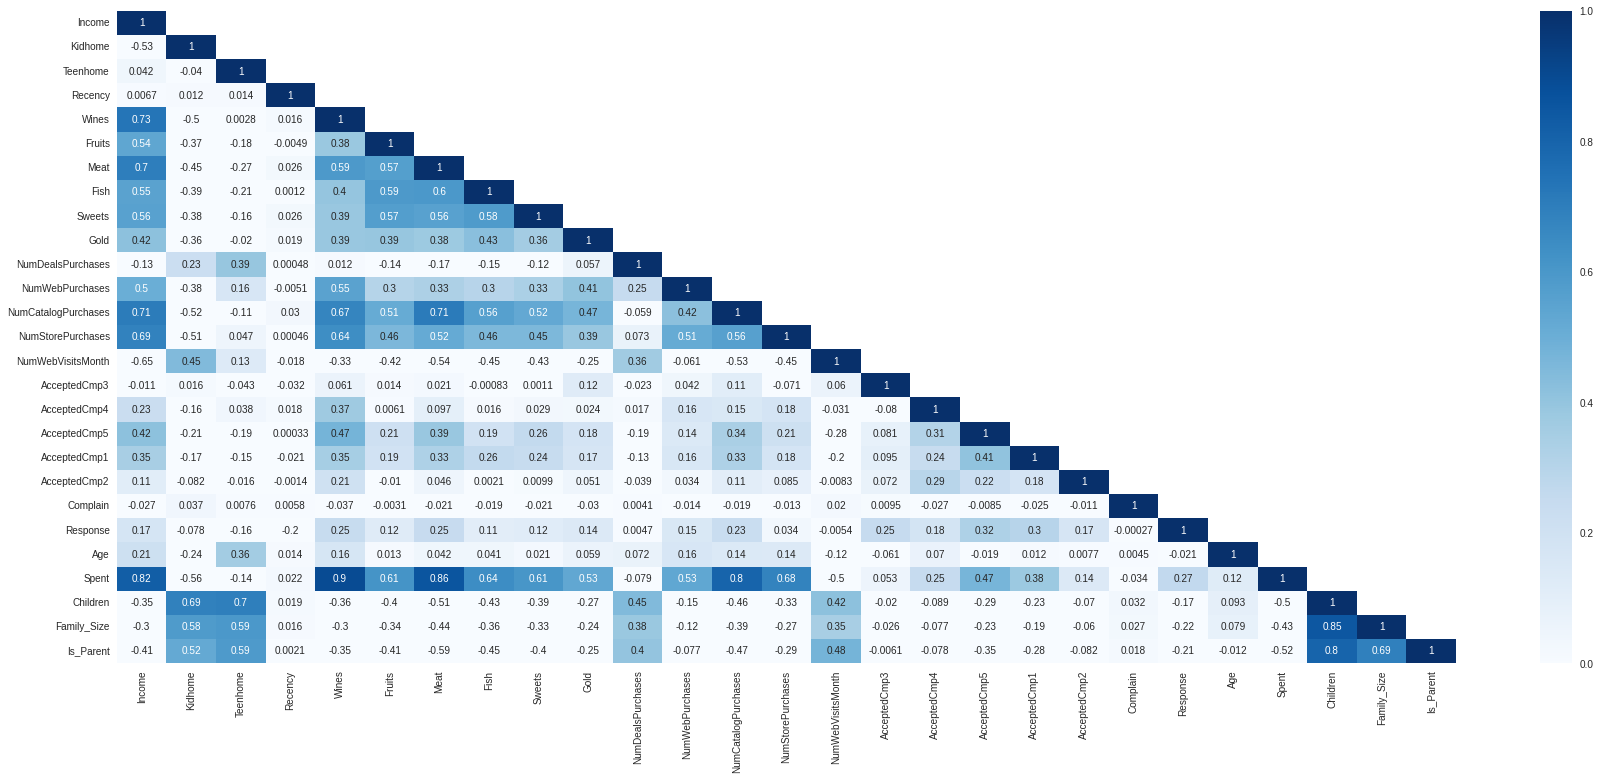

In [17]:
# VARIABLES
corr = df.corr()
mask = np.triu(np.ones_like(corr), k = 1)

# POSITION 
fig = plt.figure(figsize = (30,12))
gs = fig.add_gridspec(nrows = 1)
ax0 = fig.add_subplot(gs[0,0])

# CORRELATION MARIX
sns.heatmap(corr, annot = True, cmap = "Blues", vmin = 0, vmax = 1, ax = ax0, mask = mask)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize = 10)
ax0.set_yticklabels(ax0.get_yticklabels(), fontsize = 10)

for i in ["top", "right", "bottom", "left"]:
    ax0.spines[i].set_visible(False)
    
plt.show()

## **Data Preparation**

In [18]:
# LIST OF CATEGORICAL FEATURES
cf = (df.dtypes == "object")
cols = list(cf[cf].index)

print(cols)

['Education', 'Living_With']


In [19]:
# LABEL ENCODING
le = LabelEncoder()
for i in cols:
    df[i] = df[[i]].apply(le.fit_transform)

In [20]:
# COPY
dfc = df.copy()
cols = ["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1","AcceptedCmp2", "Complain", "Response"]
dfc =dfc.drop(cols, axis = 1)

# SCALING
sc = StandardScaler()
sc.fit(dfc)
sc_df = pd.DataFrame(sc.transform(dfc), columns = dfc.columns)
sc_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.892338,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,...,1.424772,2.628526,-0.562650,0.689203,1.017189,1.679323,-1.347625,-1.266589,-1.759012,-1.58466
1,-0.892338,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,...,-1.132957,-0.588043,-1.179732,-0.139645,1.273530,-0.963897,-1.347625,1.403420,0.448513,0.63105
2,-0.892338,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,...,1.424772,-0.230646,1.288596,-0.554069,0.333612,0.281242,0.742046,-1.266589,-0.655250,-1.58466
3,-0.892338,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,...,-0.767567,-0.945440,-0.562650,0.274779,-1.289883,-0.920675,0.742046,0.068415,0.448513,0.63105
4,0.571654,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,...,0.328602,0.126750,0.054432,-0.139645,-1.033542,-0.307248,0.742046,0.068415,0.448513,0.63105


## **Dimensionality Reduction**


Dimensionality reduction involves reducing the number of random variables or features under consideration. This is achieved by obtaining a set of principal variables that capture the essential information and characteristics of the data. By reducing the dimensionality of the feature space, we can simplify the analysis, improve computational efficiency, and potentially enhance the performance of the classifier.

In this particular problem, there are multiple factors or features that will be used for the final classification. However, dealing with a large number of features can be challenging. Additionally, many of these features exhibit correlation, resulting in redundancy. To address these challenges, I will apply dimensionality reduction techniques to the selected features before utilizing a classifier.

**Principal component analysis (PCA):** Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation while retaining as much of the original information as possible. PCA achieves this by identifying a set of orthogonal axes, known as principal components, that capture the maximum amount of variation in the data. PCA is particularly effective when there are correlated features in the data and when there is a high-dimensional feature space. By reducing the dimensionality, PCA simplifies the analysis, removes redundancy, and improves computational efficiency.

In [21]:
# DIMENSIONALITY REDUCTION WITH PCA
pca = PCA(n_components = 3)
pca.fit(sc_df)
pca_df = pd.DataFrame(pca.transform(sc_df), columns = (["col1","col2", "col3"]))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2205.0,-8.458842e-18,2.901676,-6.020463,-2.575461,-0.785748,2.421799,7.477675
col2,2205.0,3.292906e-17,1.705683,-4.304345,-1.338716,-0.155972,1.248144,6.133599
col3,2205.0,3.242556e-17,1.152565,-3.016218,-0.902721,-0.117200,0.805065,3.960850


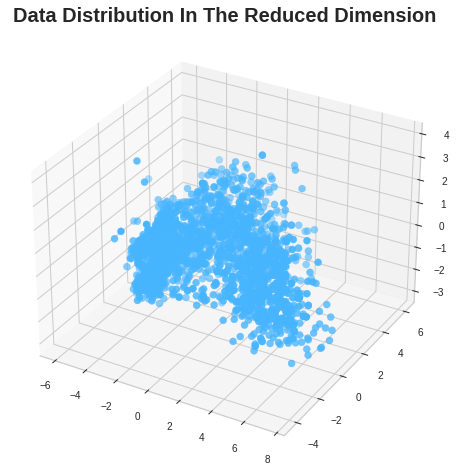

In [22]:
x =pca_df["col1"]
y =pca_df["col2"]
z =pca_df["col3"]

#3D PLOT OF DATA IN THE REDUCED DIMENSION
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection="3d")
ax.scatter(x,y,z, c="#47B5FF", marker="o", s = 50)
ax.set_title("Data Distribution In The Reduced Dimension", fontsize = 20, fontweight = "bold")
plt.show()

## **Clustering**

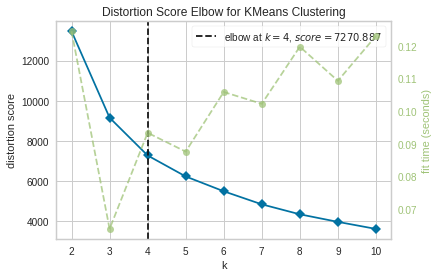

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# ELBOW METHOD
em = KElbowVisualizer(KMeans(), k=10)
em.fit(pca_df)

em.show()

In [24]:
# AGGLOMERATIVE CLUSTERING
ac = AgglomerativeClustering(n_clusters=4)
acf = ac.fit_predict(pca_df)
pca_df["Cluster"] = acf
df["Cluster"]= acf

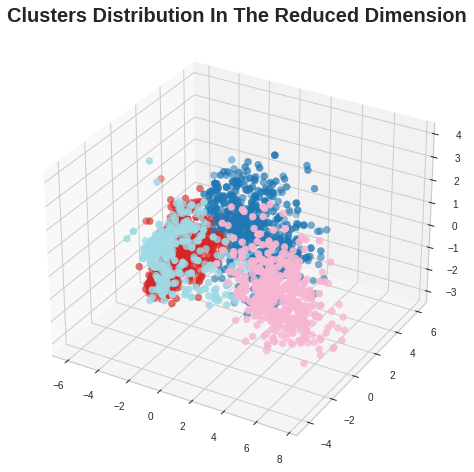

In [25]:
# PLOTTING THE CLUSTERS IN THE REDUCED DIMENSION
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(projection='3d', label="bla")
ax.scatter(x, y, z, s=50, c=pca_df["Cluster"], marker='o', cmap = "tab20")
ax.set_title("Clusters Distribution In The Reduced Dimension", fontsize = 20, fontweight = "bold")
plt.show()

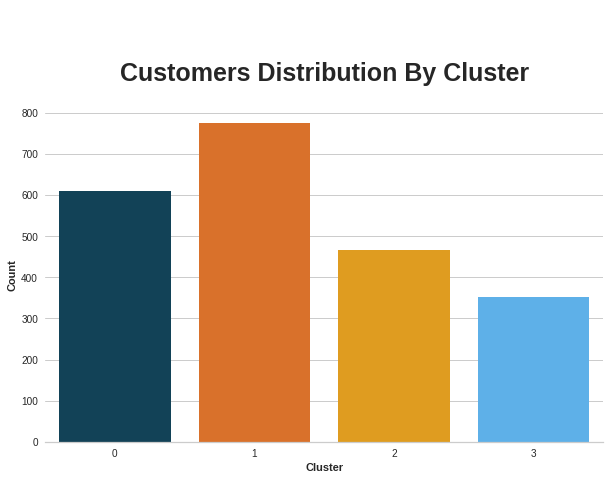

In [26]:
colors = ["#064663", "#F66B0E", "#FFA500", "#47B5FF"]

# POSITION
fig = plt.figure(figsize = (10,8))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.7)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Customers Distribution By Cluster",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION+
sns.countplot(data = df, x = "Cluster", palette = colors, ax = ax1)
ax1.set_ylabel("Count", fontweight = "bold")
ax1.set_xlabel("Cluster", fontweight = "bold")
ax1.spines[["top", "right", "left"]].set_visible(False)

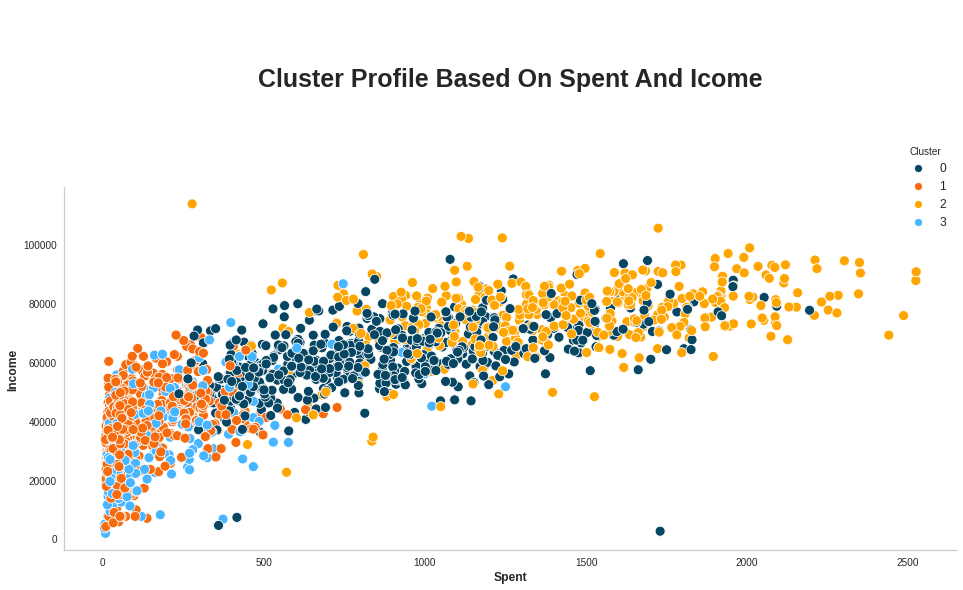

In [27]:
colors = ["#064663", "#F66B0E", "#FFA500", "#47B5FF"]

# POSITION
fig = plt.figure(figsize = (16,10))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Cluster Profile Based On Spent And Icome",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION
ax1.grid(color = "white")
sns.scatterplot(data = df, x = "Spent", y = "Income", hue = "Cluster", s = 100, palette = colors , ax = ax1)
ax1.legend(title="Cluster", bbox_to_anchor=(1,1), loc="right", fontsize=12)
ax1.set_ylabel("Income", fontweight = "bold", fontsize = 12)
ax1.set_xlabel("Spent", fontweight = "bold", fontsize = 12)

ax1.spines[["top", "right"]].set_visible(False)

**Cluster 0:** This group consists of customers with high spending but average income. They are willing to spend a significant amount of money despite their income level. Targeting this group with offers and promotions that provide value for their spending habits could be effective.

**Cluster 1:** Customers in this group exhibit high spending patterns but have low income. Despite their financial limitations, they are willing to spend a significant portion of their income. It may be useful to focus on providing value and affordability to this group, ensuring that the offers and promotions cater to their specific financial constraints.

**Cluster 2:** Customers in this group have both high spending and high income. They are considered high-value customers who are willing to spend a substantial amount of money. Offering exclusive and premium products or services to this group could be beneficial in maximizing their value and loyalty.

**Cluster 3:** This group comprises customers with low spending and low income. They have limited financial resources and are more budget-conscious. Tailoring affordable and cost-effective offers that align with their limited spending capabilities may be effective in attracting their attention.

Understanding the spending and income patterns within each group allows for targeted marketing strategies and tailored offers that align with the unique characteristics and preferences of each customer segment.

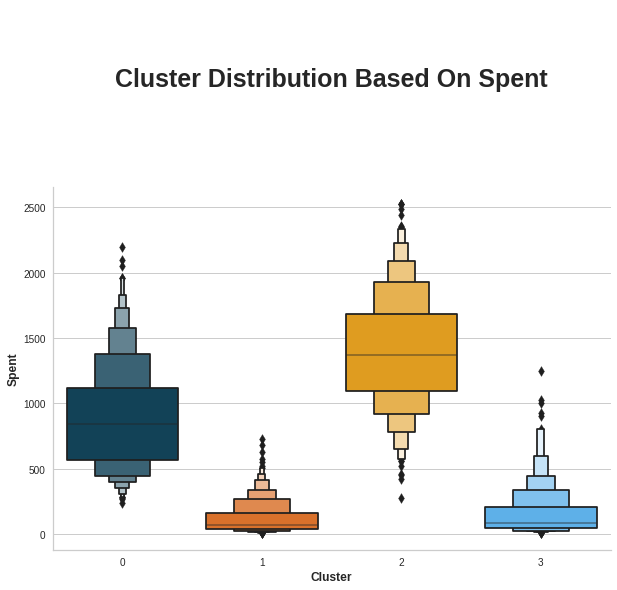

In [28]:
colors = ["#064663", "#F66B0E", "#FFA500", "#47B5FF"]

# POSITION
fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Cluster Distribution Based On Spent",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION
sns.boxenplot(data = df, x = "Cluster", y = "Spent", palette = colors , ax = ax1)
ax1.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax1.set_xlabel("Cluster", fontweight = "bold", fontsize = 12)
ax1.spines[["top", "right"]].set_visible(False)

It is evident that cluster 2 is the largest customer segment, closely followed by cluster 0. To develop targeted marketing strategies, we can examine the spending patterns of each cluster to understand their preferences and tailor our approaches accordingly.

For cluster 2, being the largest customer segment, it would be crucial to analyze their spending behavior in detail. This could involve examining the specific products, services, or categories they are spending on the most. By understanding their preferences, we can create personalized marketing campaigns that highlight relevant offers, discounts, or promotions to further engage and retain these customers.

Similarly, for cluster 0, which is the second-largest segment, it is important to investigate their spending patterns. By identifying the areas where they allocate their spending, we can design marketing strategies that cater to their specific interests and needs. This could involve highlighting products or services that align with their preferences or creating incentives to encourage even higher spending.

Additionally, exploring the spending patterns of other clusters, such as cluster 1 and cluster 3, can provide valuable insights. Understanding their spending behavior can help identify potential growth opportunities or areas where targeted marketing efforts can be employed to attract their attention and increase their engagement.

Overall, by analyzing the spending patterns of each cluster, we can develop targeted marketing strategies that align with their preferences and needs. This approach enables us to optimize marketing campaigns, enhance customer satisfaction, and drive sales growth.

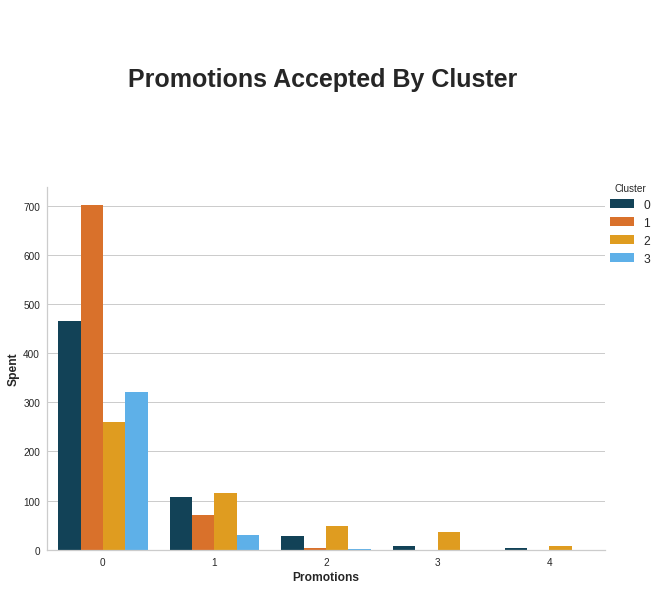

In [29]:
colors = ["#064663", "#F66B0E", "#FFA500", "#47B5FF"]
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]


# POSITION
fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Promotions Accepted By Cluster ",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION
sns.countplot(x = df["Total_Promos"], hue = df["Cluster"], palette= colors, ax = ax1)
ax1.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax1.set_xlabel("Promotions", fontweight = "bold", fontsize = 12)
ax1.legend(title="Cluster", bbox_to_anchor=(1.1,.9), loc="right", fontsize=12,)
ax1.spines[["top", "right"]].set_visible(False)

The campaigns have received a listless response thus far, with only a small number of participants overall. Additionally, no individual has taken part in all five campaigns. 
This indicates the need for more precise targeting and comprehensive planning in order to increase sales. Implementing better-targeted and well-planned campaigns is crucial to stimulate greater engagement and drive sales growth.

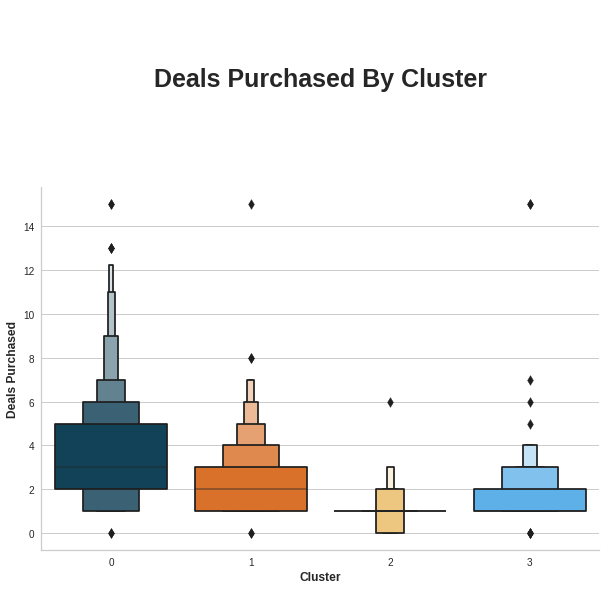

In [30]:
colors = ["#064663", "#F66B0E", "#FFA500", "#47B5FF"]

# POSITION
fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(nrows = 2, ncols = 1, hspace = -.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# TITLE 1
ax0.text(0.5 ,0.8,
        "Deals Purchased By Cluster",
        fontsize = 25,
        fontweight = "bold",
        horizontalalignment = "center",
        verticalalignment = "center")
ax0.set(xticks = [], yticks = [])
ax0.tick_params(left = False, right = False)
ax0.spines[["top", "right", "bottom", "left"]].set_visible(False)

# GENERAL RATING DISTRIBUTION
sns.boxenplot(y=df["NumDealsPurchases"],x=df["Cluster"], palette = colors , ax = ax1)
ax1.set_ylabel("Deals Purchased", fontweight = "bold", fontsize = 12)
ax1.set_xlabel("Cluster", fontweight = "bold", fontsize = 12)
ax1.spines[["top", "right"]].set_visible(False)

While the deals offered have been successful overall, they have shown the best outcome with cluster 0 and cluster 1. These clusters have responded positively to the deals and shown high engagement. 
However, it seems that customers in cluster 2 have not been as receptive to the deals. On the other hand, cluster 3 has not shown a significant level of enthusiasm towards any particular offer or deal. It is important to analyze these patterns and find strategies to better engage cluster 2 and cluster 3 customers, possibly by tailoring deals to their specific preferences and interests.

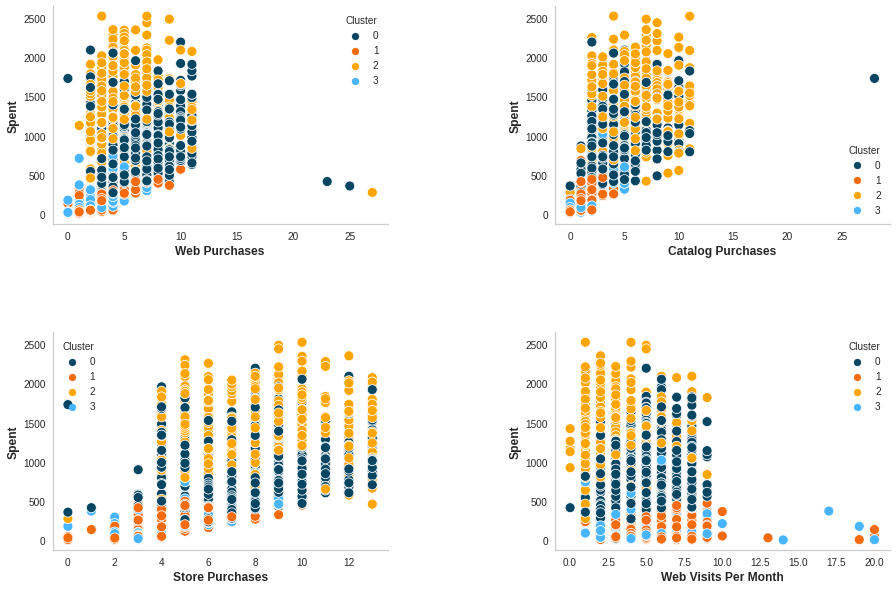

In [31]:
colors = ["#064663", "#F66B0E", "#FFA500", "#47B5FF"]

# POSITION
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(nrows = 2, ncols = 2, wspace = .5 ,hspace = .5)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

# BACKGROUND
background = "white"
fig.patch.set_facecolor(background)
ax0.set_facecolor(background)
ax1.set_facecolor(background)

# WEB PURCHASES
ax1.grid(color = "white")
sns.scatterplot(data = df, x = "NumWebPurchases", y = "Spent", hue = "Cluster", s = 100, palette = colors , ax = ax1)
ax1.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax1.set_xlabel("Web Purchases", fontweight = "bold", fontsize = 12)
ax1.spines[["top", "right"]].set_visible(False)

# CATALOG PURCHASES
ax2.grid(color = "white")
sns.scatterplot(data = df, x = "NumCatalogPurchases", y = "Spent", hue = "Cluster", s = 100, palette = colors , ax = ax2)
ax2.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax2.set_xlabel("Catalog Purchases", fontweight = "bold", fontsize = 12)
ax2.spines[["top", "right"]].set_visible(False)

# STORE PURCHASES
ax3.grid(color = "white")
sns.scatterplot(data = df, x = "NumStorePurchases", y = "Spent", hue = "Cluster", s = 100, palette = colors , ax = ax3)
ax3.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax3.set_xlabel("Store Purchases", fontweight = "bold", fontsize = 12)
ax3.spines[["top", "right"]].set_visible(False)

# WEB VISITS
ax4.grid(color = "white")
sns.scatterplot(data = df, x = "NumWebVisitsMonth", y = "Spent", hue = "Cluster", s = 100, palette = colors , ax = ax4)
ax4.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax4.set_xlabel("Web Visits Per Month", fontweight = "bold", fontsize = 12)
ax4.spines[["top", "right"]].set_visible(False)

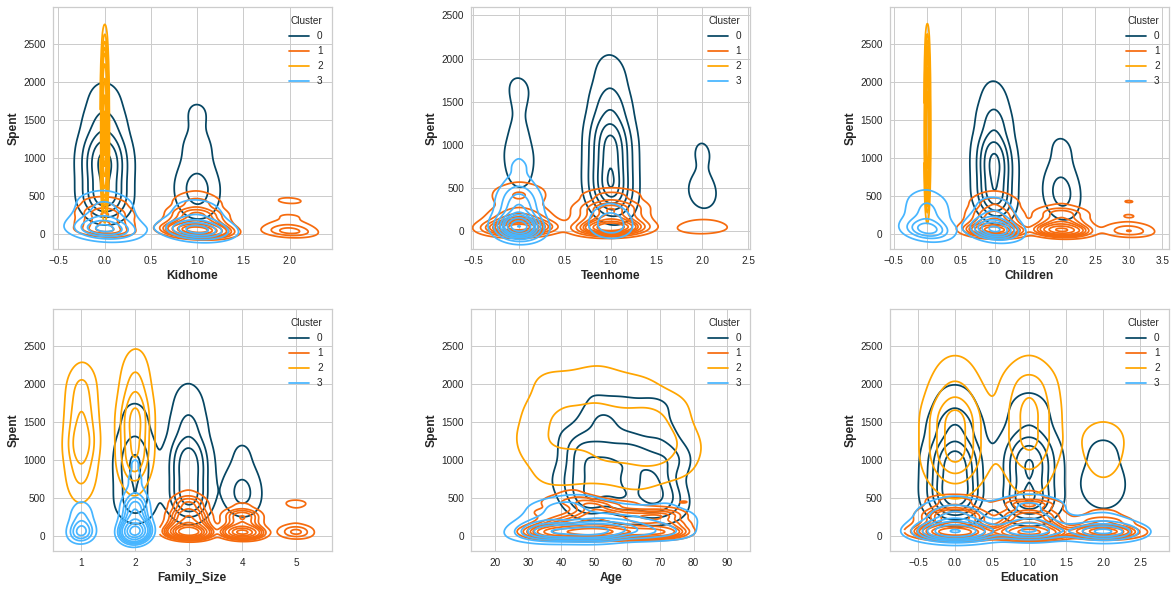

In [38]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(nrows = 2, ncols = 3, wspace = .5, hspace = .25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

sns.kdeplot(data = df, x = "Kidhome", y = "Spent", hue = "Cluster", palette = colors, shade = False, ax = ax0)
ax0.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax0.set_xlabel("Kidhome", fontweight = "bold", fontsize = 12)

sns.kdeplot(data = df, x = "Teenhome", y = "Spent", hue = "Cluster", palette = colors, shade = False, ax = ax1)
ax1.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax1.set_xlabel("Teenhome", fontweight = "bold", fontsize = 12)

sns.kdeplot(data = df, x = "Children", y = "Spent", hue = "Cluster", palette = colors, shade = False, ax = ax2)
ax2.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax2.set_xlabel("Children", fontweight = "bold", fontsize = 12)

sns.kdeplot(data = df, x = "Family_Size", y = "Spent", hue = "Cluster", palette = colors, shade = False, ax = ax3)
ax3.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax3.set_xlabel("Family_Size", fontweight = "bold", fontsize = 12)

sns.kdeplot(data = df, x = "Age", y = "Spent", hue = "Cluster", palette = colors, shade = False, ax = ax4)
ax4.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax4.set_xlabel("Age", fontweight = "bold", fontsize = 12)

sns.kdeplot(data = df, x = "Education", y = "Spent", hue = "Cluster", palette = colors, shade = False, ax = ax5)
ax5.set_ylabel("Spent", fontweight = "bold", fontsize = 12)
ax5.set_xlabel("Education", fontweight = "bold", fontsize = 12)


plt.show()

In [33]:
df["Education"].value_counts()

0    1113
1     840
2     252
Name: Education, dtype: int64

In [34]:
pd.crosstab(df["Cluster"], df["Is_Parent"], normalize = "index")

Is_Parent,0,1
Cluster,,
0,0.016367,0.983633
1,0.000000,1.000000
2,0.997854,0.002146
3,0.433428,0.566572


In [35]:
pd.crosstab(df["Cluster"], df["Living_With"], normalize = "index")

Living_With,0,1
Cluster,,
0,0.345336,0.654664
1,0.154839,0.845161
2,0.433476,0.566524
3,0.708215,0.291785


In [36]:
df.groupby("Cluster")["Age", "Income", "Spent", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"].mean().T

Cluster,0,1,2,3
Age,58.184943,52.703226,54.564378,49.456091
Income,62179.302782,37087.232258,76026.517167,33043.067989
Spent,883.201309,118.015484,1399.914163,154.628895
NumWebPurchases,6.559738,2.389677,4.978541,2.441926
NumCatalogPurchases,3.790507,0.619355,5.907725,0.804533
NumStorePurchases,8.191489,3.428387,8.362661,3.631728
NumWebVisitsMonth,5.396072,6.464516,2.635193,6.325779


## **Conclusions**

**Cluster 0:**
* Almost all individuals in this cluster are parents.
* Families in this cluster have a maximum of four members and at least two.
* Single parents are a subset of this customer group, as indicated by their living status.
* The majority of households in this cluster have teenagers.
* The average age within this cluster ranges from 45 to 68, with a mean age of 57.

**Cluster 1:**
* All individuals in this cluster are parents.
* Families in this cluster have a maximum of five members and a minimum of three.
* A majority of households in this cluster have teenagers.
* The average age within this cluster ranges from 30 to 80, with a mean age of 53.

**Cluster 2:**
* None of the individuals in this cluster are parents.
* Families in this cluster have a maximum of two members.
* Couples slightly outnumber single individuals.
* The age range in this cluster spans across all ages, with a mean age of 55.
* This cluster consists of individuals with a high income level.

**Cluster 3:**
* Around 56% of individuals in this cluster are parents.
* Families in this cluster have a maximum of two.
* The majority of families have only one child, and typically not teenagers.
* Single parents are a subset of this customer group, as indicated by their living status.
* The average age within this cluster is 49, indicating a relatively younger population.
* This cluster is characterized by a lower income group.

In conclusion, the analysis of the different customer clusters provides valuable insights into their parental status, family size, age demographics, and income levels. Cluster 0 consists of mostly parents in the age range of 45 to 68, with families of maximum four members and teenagers present. This cluster represents established families with older children. Cluster 1 also comprises parents, with an age range of 30 to 80 and families of three to five members, including teenagers. This cluster encompasses families with both younger and older children. Cluster 2 is unique as it consists of individuals without children. Couples slightly outnumber single individuals, and the age range is diverse, with a mean age of 55. This cluster represents individuals with a high income level. Cluster 3 comprises a mix of parents and non-parents, with families of two members and typically one child who is not a teenager. The average age within this cluster is 49, indicating a relatively younger population, while the income level is lower compared to other clusters.

Based on the customer cluster analysis, it is crucial to tailor sales strategies to effectively reach each segment: 

* For Cluster 0 and Cluster 1, which mainly consist of parents with families and teenagers, focus on marketing strategies that cater to their family needs. Highlight products and services that are suitable for different age groups within families, such as family bundles or discounts on items for teenagers. Consider organizing events or workshops specifically designed for parents and teenagers to engage with this segment.

* For Cluster 2, composed of individuals without children and with a high income level, target them with premium and luxury offerings. Emphasize exclusivity, quality, and personalized experiences. Promote high-end products or services that align with their affluent lifestyles. Consider collaborations with luxury brands or offer VIP memberships for this customer segment.

* For Cluster 3, characterized by a mix of parents and non-parents with lower income levels, focus on affordability and value for money. Offer budget-friendly options, bundle deals, or discounts to appeal to their cost-conscious mindset. Emphasize the cost-effectiveness and practicality of your products or services. Consider loyalty programs to encourage repeat business from this segment.